# CREDIT CARD FRAUD DETECTION ¶

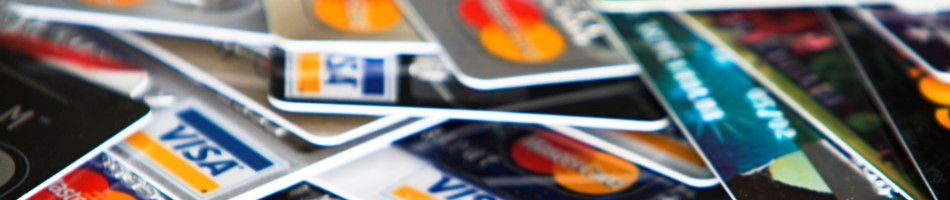

# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

# Goal
Build a machine learning model to identify fraudulent credit card transactions.
Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine. Evaluate the model's performance using metrics like precision, recall,and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [1]:
# Importing Basic Packages
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data set
df = pd.read_csv('D:\creditcard.csv')

# Details of column
### Time
Number of seconds elapsed between this transaction and the first transaction in the dataset
### V1-V8
may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
### Amount
Transaction amount
### Class
1 for fraudulent transactions, 0 otherwiseumns


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# 1 fraud 0 not fraud
fraud_count = df['Class'].value_counts()
fraud_count

Class
0    284315
1       492
Name: count, dtype: int64

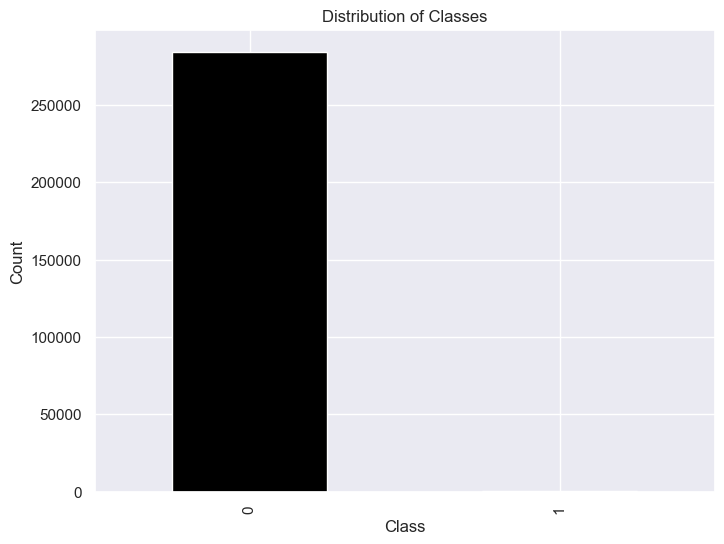

In [10]:
plt.figure(figsize=(8, 6))
fraud_count.plot(kind='bar', color='black')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
total_amount = df['Amount'].sum()
total_amount

25162590.009999998

In [12]:
fraud_amount = df[df['Class'] == 1]['Amount'].sum()
fraud_amount

60127.97

In [13]:
successful_transcation_amount = total_amount - fraud_amount
successful_transcation_amount

25102462.04

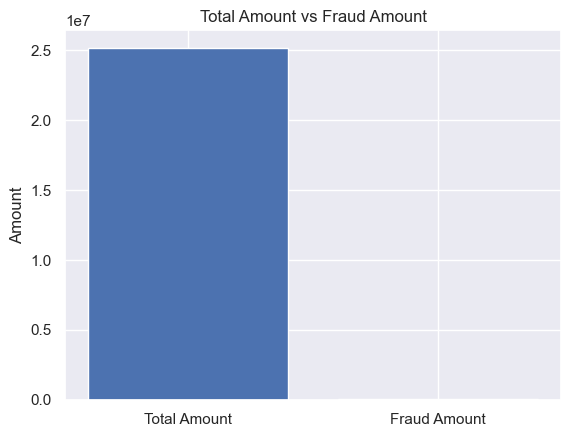

In [14]:
plt.bar(['Total Amount', 'Fraud Amount'], [total_amount, fraud_amount])
plt.title('Total Amount vs Fraud Amount')
plt.ylabel('Amount')
plt.show()

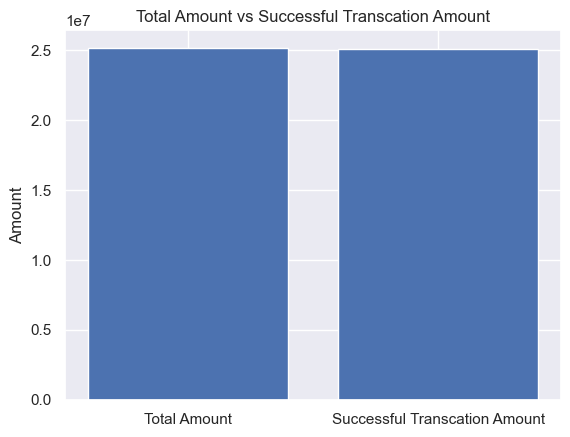

In [15]:
plt.bar(['Total Amount', 'Successful Transcation Amount'], [total_amount, successful_transcation_amount])
plt.title('Total Amount vs Successful Transcation Amount')
plt.ylabel('Amount')
plt.show()

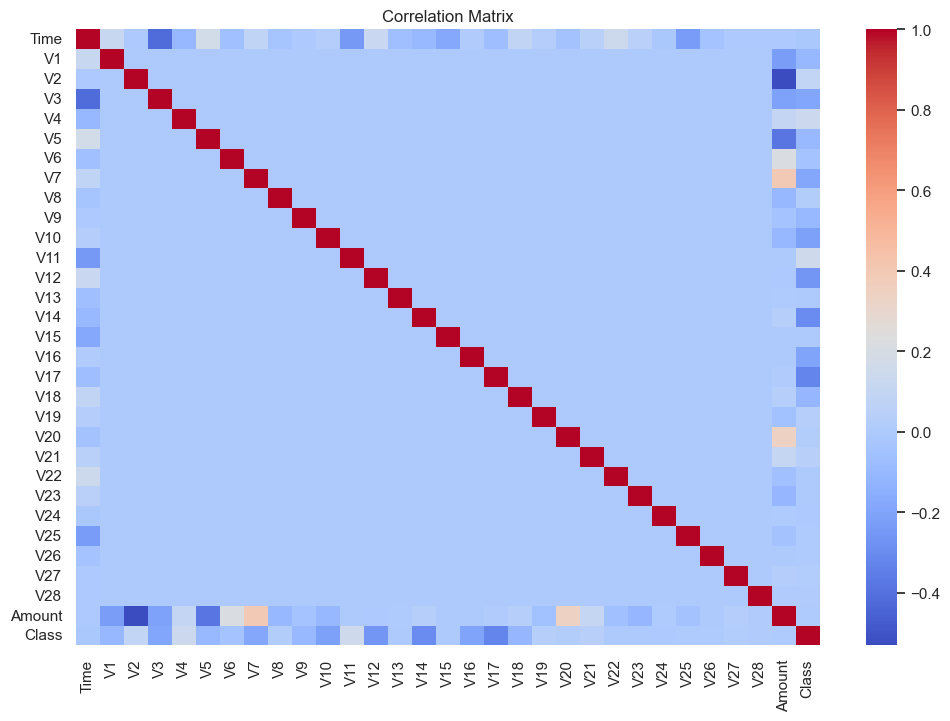

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

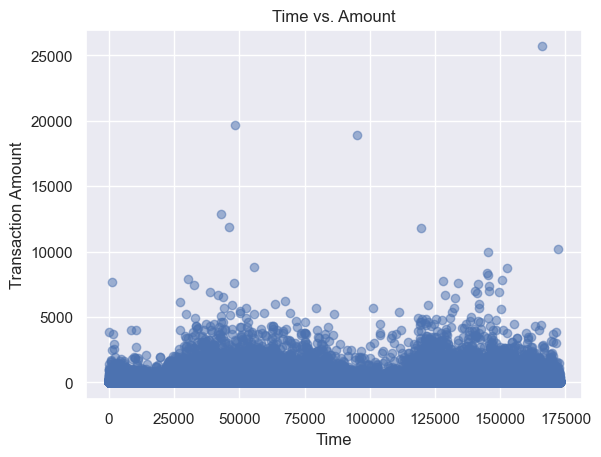

In [17]:
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.title('Time vs. Amount')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

# Undersampling 

In [18]:
# split the fraud and successfull data
fraud_done =df[df.Class==1]
successful_done = df[df.Class==0]

In [19]:
fraud_done

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
successful_done

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
fraud_done.shape

(492, 31)

In [22]:
successful_done.shape

(284315, 31)

In [23]:
successful_sample = successful_done.sample(n=492)

In [24]:
successful_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109993,71631.0,0.978854,0.004237,0.713758,0.995155,0.060208,1.078073,-0.405241,0.472729,0.199928,...,0.068909,0.324161,0.189530,-0.672105,0.045454,-0.386415,0.102834,0.021816,18.49,0
164911,117071.0,-0.951220,-1.072789,1.234443,-2.160705,-0.317646,-0.383441,0.138256,0.165936,-0.907294,...,0.188860,-0.082505,0.413330,-0.416956,-0.381014,-0.596802,0.044143,0.157466,172.00,0
195986,131309.0,-3.500803,-3.890627,0.753128,-2.325457,1.353739,-0.958667,-1.621775,0.412085,-2.061187,...,-0.041005,-0.358824,-0.811468,0.186220,0.529990,-0.216223,-0.212901,-0.571975,98.50,0
103582,68721.0,1.201671,0.240168,0.629415,0.548717,-0.476426,-0.772399,-0.000029,-0.101534,-0.307915,...,-0.185762,-0.551961,0.142247,0.544712,0.177440,0.062620,-0.029355,0.012189,2.67,0
170783,120351.0,-0.689193,-0.560023,1.381453,-1.885942,-0.487167,0.025660,-0.007463,0.106438,-1.017673,...,-0.037563,-0.298214,-0.007913,-0.499008,0.488277,-0.338568,-0.206951,-0.098768,109.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27487,34569.0,-0.364212,0.947784,1.141246,-0.113590,0.092797,-0.509100,0.493185,0.189463,-0.379408,...,-0.252139,-0.774275,-0.044801,-0.094015,-0.203068,0.080331,0.230023,0.081282,4.49,0
43006,41333.0,-1.101626,0.291015,2.927166,-1.051514,0.465199,1.461751,0.239287,0.531564,0.481730,...,0.043795,0.474612,-0.160555,-0.627284,0.011989,0.154567,-0.091402,-0.175761,9.09,0
194667,130707.0,2.046386,-0.124309,-1.211040,0.210677,0.088618,-0.669888,0.061977,-0.153192,0.334614,...,-0.265079,-0.672646,0.281459,-0.411257,-0.282330,0.203219,-0.076222,-0.074408,1.98,0
82810,59561.0,-2.251724,0.782551,2.260907,1.008504,-0.449630,0.535623,0.700329,-0.293023,1.726055,...,-0.302900,0.666534,-0.484512,0.068577,0.409954,-0.128503,-0.080197,-0.421648,86.70,0


In [25]:
new = pd.concat([successful_sample,fraud_done], axis = 0)

In [26]:
new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109993,71631.0,0.978854,0.004237,0.713758,0.995155,0.060208,1.078073,-0.405241,0.472729,0.199928,...,0.068909,0.324161,0.189530,-0.672105,0.045454,-0.386415,0.102834,0.021816,18.49,0
164911,117071.0,-0.951220,-1.072789,1.234443,-2.160705,-0.317646,-0.383441,0.138256,0.165936,-0.907294,...,0.188860,-0.082505,0.413330,-0.416956,-0.381014,-0.596802,0.044143,0.157466,172.00,0
195986,131309.0,-3.500803,-3.890627,0.753128,-2.325457,1.353739,-0.958667,-1.621775,0.412085,-2.061187,...,-0.041005,-0.358824,-0.811468,0.186220,0.529990,-0.216223,-0.212901,-0.571975,98.50,0
103582,68721.0,1.201671,0.240168,0.629415,0.548717,-0.476426,-0.772399,-0.000029,-0.101534,-0.307915,...,-0.185762,-0.551961,0.142247,0.544712,0.177440,0.062620,-0.029355,0.012189,2.67,0
170783,120351.0,-0.689193,-0.560023,1.381453,-1.885942,-0.487167,0.025660,-0.007463,0.106438,-1.017673,...,-0.037563,-0.298214,-0.007913,-0.499008,0.488277,-0.338568,-0.206951,-0.098768,109.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [27]:
new['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [28]:
x = new.drop('Class', axis=1)

In [29]:
y = new['Class']
y

109993    0
164911    0
195986    0
103582    0
170783    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [30]:
# Spliting the data into Train Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [32]:
# Building a model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)

In [33]:
print("Accuracy:", accuracy_score(logistic_predictions,y_test))
print("Classification Report:\n", classification_report(logistic_predictions,y_test))

Accuracy: 0.9187817258883249
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       101
           1       0.91      0.93      0.92        96

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [34]:
logistic_predictions1 = logistic_model.predict(x_train)

In [35]:
print("Accuracy:", accuracy_score(logistic_predictions1,y_train))
print("Classification Report:\n", classification_report(logistic_predictions1,y_train))

Accuracy: 0.9466327827191868
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       413
           1       0.92      0.97      0.95       374

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



# Oversampling 

In [36]:
from imblearn.over_sampling import SMOTE
x1 = df.drop('Class', axis=1)
y1 = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

smote = SMOTE()
X_train, Y_train = smote.fit_resample(x_train, y_train)

In [37]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(x_test)

In [38]:
print("Accuracy:", accuracy_score(logistic_predictions,y_test))
print("Classification Report:\n", classification_report(logistic_predictions,y_test))

Accuracy: 0.983199325866367
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     55929
           1       0.89      0.08      0.15      1033

    accuracy                           0.98     56962
   macro avg       0.94      0.54      0.57     56962
weighted avg       0.98      0.98      0.98     56962



In [39]:
logistic_predictions1 = logistic_model.predict(X_train)
print("Accuracy:", accuracy_score(logistic_predictions1,Y_train))
print("Classification Report:\n", classification_report(logistic_predictions1,Y_train))

Accuracy: 0.9736822436480824
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    232159
           1       0.96      0.98      0.97    222743

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902

